## Mid Term Project

### Q1)

Its all about markdowns.

### Q3) 

##### ECG and ECG signals:

Electrocardiogram (ECG) represents electrical activity of human heart. ECG is composite from
5 waves - P, Q, R, S and T. This signal could be measured by electrodes from human body in typical
engagement. Signals from these electrodes are brought to simple electrical circuits with amplifiers and
analogue – digital converters.

Heart rate frequency is very important health status information. The frequency measurement is
used in many medical or sport applications like stress tests or life treating situation prediction. One of
possible ways how to get heart rate frequency is compute it from the ECG signal. Heart rate frequency
can be detected d from ECG signal by many methods and algorithms.

Many algorithms for heart rate detection are based on QRS complex detection and hear rate is
computed like distance between QRS complexes. QRS complex can be detected using for example
algorithms from the field of artificial neural networks, genetic algorithms, wavelet transforms or filter
banks. Moreover the next way how to detect QRS complex is to use adaptive threshold. The
direct methods for heart rate detection are ECG signal spectral analyse and Short-Term
Autocorrelation method.

Disadvantage of all these methods is their complicated implementation to microprocessor unit for real time heart rate frequency detection.The designed digital filters and heart rate frequency detection algorithms are very simple but robust. They can be used for ECG signal processing during physical stress test with muscle artefacts. They are suitable for easy implementation in C language to microprocessor unit in embedded device. Design of these methods has been very easy with Matlab tools and functions.

### Q4) 


 File length: 43081


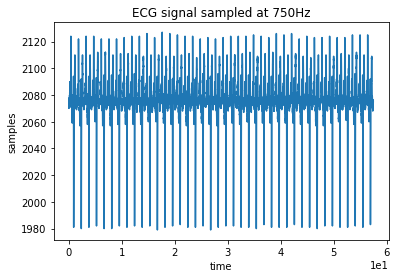

In [1]:

%matplotlib inline
import numpy as np
import scipy as Sci
import pylab as pl
import scipy.linalg
import matplotlib.pyplot as plt
from __future__ import division

v = open('aami3a.dat','rb')
ecg = np.fromfile(v,count=-1,dtype=np.uint16) 
print('\n File length: ' + str(len(ecg)) )
plt.subplot(111)
x=np.arange(0,43081/750.,1/750.)
plt.plot(x,ecg[:43081])
plt.xlabel('time')
plt.ylabel('samples')
plt.title('ECG signal sampled at 750Hz')
plt.ticklabel_format( axis='x', scilimits=(0,0))
v.close()

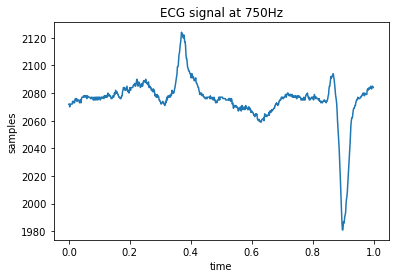

In [2]:
x1=np.arange(0,750/750.,1/750.)
plt.plot(x1,ecg[:750])
plt.xlabel('time')
plt.ylabel('samples')
plt.title('ECG signal at 750Hz')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
v.close()

### Q5) 

If a person has 100 beats per minute. 
Then 100/60= 1.66. 
Now, we want 5 beats in the signal
Therefore, 1.66*5= 8.3
Number of samples = 8.3/(1.5*10e-3)
                  = 5530 (appx) 

### Q6)

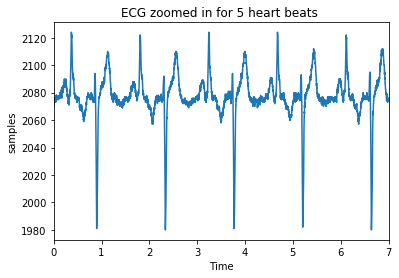

In [3]:

x1=np.arange(0,5530/750.,1/750.)
plt.plot(x1,ecg[:5530])
plt.xlabel('Time')
plt.ylabel('samples')
plt.title('ECG zoomed in for 5 heart beats ')
plt.xlim([0,7])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


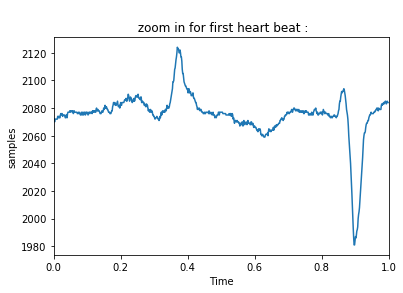

In [4]:

x1=np.arange(0,750/750.,1/750.)
plt.plot(x1,ecg[:750])
plt.title('\n zoom in for first heart beat :')
plt.xlabel('Time')
plt.ylabel('samples')
plt.xlim([0,1])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


### Q7)

Since the person has the shortest QRS curve, the blood pressure of that person is low.

### Q8)

In [5]:
t=np.arange(21540)
N=0
x=np.amax(ecg[:750])
x1=np.arange(0,21540/750.,1/750.)
print 'Peak of QRS = ' +str (x)
for index in t:
    if ecg[index]>=2124:
        N=N+1
print 'Heart rate in beats/minute = ' +str(N*2)


Peak of QRS = 2124
Heart rate in beats/minute = 44


### Q9) 

DFT data peak =  4.98149090804


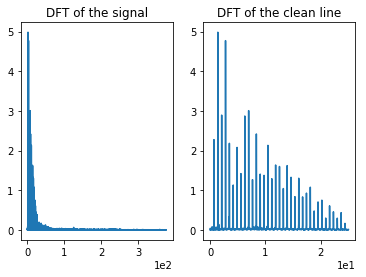

In [6]:
from __future__ import division
L2=np.arange(21540)
Line=ecg[:43080]
dataF=Line-np.mean(Line)
L=len(dataF)

x=np.arange(0,750/2.,750/43080.)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L
 
plt.subplot(121)
plt.plot(x, PyyClean[:21540])
plt.title('DFT of the signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(x>25)
inx=inx[0]
plt.subplot(122)
plt.plot(x[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of the clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
p=np.amax(PyyClean[:21540])
print 'DFT data peak =  ' +str(p)

### Q10) 

In [7]:
for index in L2:
    if PyyClean[index]>=4.9814:
        print 'Maximum obtained at f = ' +str(index/57.44)  
        break

Maximum obtained at f = 1.39275766017


### Q11, 12) 

Heart rate (bpm)  = 60/ ( R peak)
           = 60/1.3927
           = 43.08 bpm

### Q13) 
If we want to filter the signal, there is no effect on the amplitude of the signal. It can be justified by reference [5]. 

### Q14 ,15)

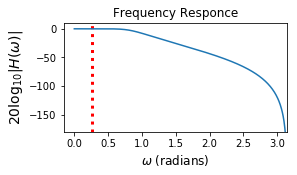

In [8]:
from scipy import signal
import numpy as np
from matplotlib import gridspec
from __future__ import division

fig=plt.figure()
fig.set_size_inches((10,5))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
x,y=signal.butter(4,Wn,btype='low',analog= False)
m,n=signal.freqz(x,y)
s=signal.lfilter(x,y,dataF)
x=np.arange(0,43080/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency Responce')
ax.plot(m, 20 * np.log10(abs(n)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=14)
ax.set_xlabel(r'$\omega$ (radians)',fontsize=12)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)


### Q16) 

DFT Data Peak = 4.98133389394
Maximum obtained at f = 1.39275766017


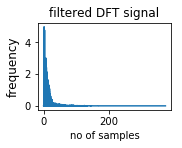

In [9]:
from matplotlib import gridspec
fig.set_size_inches((15,10))
fig=plt.figure()

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

N=len(s)
F=np.arange(0,750/2,750/43080.)
X=np.fft.fft(s)
M=abs(X)/N
ax = fig.add_subplot(plt.subplot(gs[1,1]))
ax.plot(F, M[:21540])
ax.set_title('filtered DFT signal')
ax.set_ylabel("frequency",fontsize=12)
ax.set_xlabel('no of samples',fontsize=10)


p=np.amax(M[:21540])
print 'DFT Data Peak = ' +str(p)
L2=np.arange(21540)
for index in L2:
    if M[index]>=4.98:
        print 'Maximum obtained at f = ' +str(index/57.44)  
        break 

### Q17)

Filter has no effect on the heart rate because the amplitude of the signal remains same as before. 

### SUMMARY

In this project, we learnt about the ECG signal and its processing in bio medical applications.
We also filtered the ECG signal and plotted its response before and after filtering.
By this response curve, we can calculate number of heart beats per minute for a single person.

### Q2) References

[1] Acharya, Rajendra, et al., eds. Advances in cardiac signal processing. Berlin: Springer, 2007.

[2] Signal Processing and Heart Rate Frequency Detection Methods by J.Parak, J.Havlik

[3] Gacek, Adam. "An introduction to ecg signal processing and analysis." ECG Signal Processing, Classification and Interpretation. Springer London, 2012. 21-46.

[4] Alesanco, Alvaro, and JosÉ GarcÍa. "Automatic real-time ECG coding methodology guaranteeing signal interpretation quality." IEEE Transactions on Biomedical Engineering 55.11 (2008): 2519-2527.

[5]  M. L. Ahlstrom, W. J. Tompkins, "An inexpensive microprocessor system for high-speed QRS width detection", Proc. IEEE COMPMED, pp. 81-83, 1981

